# StackOverflow Survey
使用的是Stack Overflow的2024年开发者调查，数据集下载地址：[Stack Overflow Developer Survey 2024](https://insights.stackoverflow.com/survey/2024)

这个部分的问卷我也放在了`data`文件夹下。简单来说，问题分为下面几个部分

![image](../assets/index.png)

1. **基本信息**

- `MainBranch`: 询问受访者当前的职业身份。
- `Age`: 询问受访者的年龄。
- `Employment`: 当前的就业状态（可多选）。
- `RemoteWork`: 当前的工作模式（远程或现场等）。
- `Country`: 受访者的居住地。
- `CompTotal`: 年收入。

2. **技术能力与经验**

- `YearsCode`: 总编码年限，包括学习阶段。
- `YearsCodePro`: 专业编程年限，不包括学习。
- `Language`: 使用过的编程语言及未来的意向。
- `Database`: 使用过的数据库环境及未来意向。
- `Platform`: 使用过的云平台及未来意向。
- `Webframe`, `Embedded`, `MiscTech`, `ToolsTech`: 涉及的技术领域（如框架、嵌入式系统等）。
- `OpSys`: 主力开发使用的操作系统。

3. **学习与资源**

- `LearnCode`: 学习编程的方式。
- `LearnCodeOnline`: 使用的在线学习资源。
- `TechDoc`: 技术文档的主要来源。

4. **工作环境与流程**

- `OrgSize`: 公司规模。
- `PurchaseInfluence`: 在技术采购中的个人影响力。
- `BuildvsBuy`: 技术工具开发或购买的选择。
- `AISelect`: 是否在开发过程中使用AI工具。
- `SOVisitFreq`, `SOHow`, `SOComm`: 使用Stack Overflow的习惯。

5. **工作满意度**

- `JobSat`: 对当前职业角色的满意度。
- `JobSatPoints`: 影响工作满意度的各方面权重分配。
- `Frustration`: 工作中的主要挑战。

6. **AI使用与看法**

- `AISent`: 对使用AI工具的态度。
- `AIAcc`: 对AI工具输出的信任度。
- `AIChallenges`: 使用AI相关工具的团队挑战。
- `AIEthics`: 最关心的AI伦理责任。

7. **知识共享与团队协作**

- `Knowledge_1` - `Knowledge_9`: 关于知识共享、工具使用以及阻碍的相关陈述。
- `Frequency_1` - `Frequency_3`: 团队协作中知识孤岛或需要外部帮助的频率。

## 0. 数据导入和基本信息

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

In [ ]:
# 读取数据
df = pd.read_csv('../data/StackOverflow_survey_results_public.csv')

# 读取数据字段说明
schema = pd.read_csv('../data/StackOverflow_survey_results_schema.csv')

# 显示数据基本信息
print("数据集基本信息:")
print(f"行数: {df.shape[0]}")
print(f"列数: {df.shape[1]}")

print(df.describe())

In [ ]:
# 显示每个字段的说明
print("\n字段说明:")
for _, row in schema.iterrows():
    print(f"\n{row['qname']}: {row['question']}")
    print(f"- 类型: {row['type']}")
    print(f"- 是否必填: {row['force_resp']}")

In [4]:
# 支持中文显示
plt.rcParams['font.sans-serif'] = ['SimHei']
# 用来正常显示负号
plt.rcParams['axes.unicode_minus'] = False

In [ ]:
# 计算缺失值比例
missing_percentages = (df.isnull().sum() / len(df)) * 100

plt.figure(figsize=(15, 8))
plt.bar(range(len(missing_percentages)), missing_percentages)
plt.xticks(range(len(missing_percentages)), missing_percentages.index, rotation=90)
plt.title('各字段缺失值比例')
plt.xlabel('字段名')
plt.ylabel('缺失值比例 (%)')

plt.tight_layout()
plt.show()

因为有很多字段不是必填项目，所以缺失值比例很高，这对数据处理和分析有一定的影响。

## **1. 可视化呈现**

### **单变量分析**：
  - 年龄分布：使用直方图和箱线图查看 `Age` 的分布
  - 收入分布：通过直方图显示 `CompTotal` 的年收入分布
  - 编程年限：分析 `YearsCode` 和 `YearsCodePro` 的分布
  - 国家：分析 `Country` 的分布
  - 职业身份：分析 `MainBranch`
  - 工作模式：分析 `RemoteWork`

1.年龄分布：

使用直方图和箱线图查看 `Age` 的分布，我们可以发现呢，大致围绕30岁呈现正态分布，说明30岁正是程序员/程序媛打拼的年龄（bushi）

In [ ]:
# 年龄分布
fig = plt.figure(figsize=(20, 6))

# 创建不同宽度的子图
ax1 = plt.subplot2grid((1, 10), (0, 0), colspan=7)
ax2 = plt.subplot2grid((1, 10), (0, 7), colspan=3)

# 按年龄排序
df_sorted = df.sort_values('Age')

# 直方图
sns.histplot(data=df_sorted, x='Age', bins=30, ax=ax1)
ax1.set_title('年龄分布直方图')
ax1.set_xlabel('年龄')
ax1.set_ylabel('频数')

# 箱线图
sns.boxplot(data=df_sorted, y='Age', ax=ax2)
ax2.set_title('年龄分布箱线图')
ax2.set_ylabel('年龄')

plt.suptitle('开发者年龄分布', fontsize=14)
plt.tight_layout()
plt.show()

2. 收入分布：通过直方图显示 `CompTotal` 的年收入分布，可以看到，这个收入差距差异就非常大了，最高到了1e15；中位数也来到了1w美元。

In [ ]:
# 收入分布
plt.figure(figsize=(15, 8))

# 转换为数值类型并筛选出非空收入数据
df['CompTotal'] = pd.to_numeric(df['CompTotal'], errors='coerce')
df_salary = df[df['CompTotal'].notna()]  # 经筛选出CompTotal这一列的非空值
print(df_salary[['CompTotal']].describe())
valid_ratio = len(df_salary) / len(df) * 100 # 计算有效数据比例

# 绘制收入分布直方图
# 过滤掉极端值,只保留5%到95%分位数之间的数据
salary_filtered = df_salary[
    (df_salary['CompTotal'] >= df_salary['CompTotal'].quantile(0.05)) & 
    (df_salary['CompTotal'] <= df_salary['CompTotal'].quantile(0.95))
]

sns.histplot(data=salary_filtered, x='CompTotal', bins=50,color='#99c2a2')

plt.title(f'开发者年收入分布 (有效数据比例: {valid_ratio:.1f}%)', fontsize=14)
plt.xlabel('年收入(美元)')
plt.ylabel('频数')

# # 由于收入分布可能有长尾,添加对数坐标轴
plt.xscale('log')

plt.tight_layout()
plt.show()

3. 编程年限：分析 `YearsCode` 和 `YearsCodePro` 的分布，可以发现专业编程的人员，编程年限普遍在10年以上，而总编程年限一般15年。结合上面的图像也可以得出，在参与调查的人员中，编程年龄长的人还是比较多的。

In [ ]:
# 编程年限分析
# 处理编程年限数据
df['YearsCode'] = df['YearsCode'].replace('Less than 1 year', '0.5')
df['YearsCode'] = df['YearsCode'].replace('More than 50 years', '50')
df['YearsCodePro'] = df['YearsCodePro'].replace('Less than 1 year', '0.5') 
df['YearsCodePro'] = df['YearsCodePro'].replace('More than 50 years', '50')

# 这里原来的数据是字符串类型，需要转换为数值类型，并且需要去除掉没有收集到的值

# 转换为数值类型并去除NA
# errors='coerce'表示在转换为数值类型时,如果遇到无法转换的值(如非数字字符串),
# 会将其转换为NaN(Not a Number),而不是抛出错误
df['YearsCode'] = pd.to_numeric(df['YearsCode'], errors='coerce')
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')
df_years = df.dropna(subset=['YearsCode', 'YearsCodePro'])

fig = plt.figure(figsize=(15, 8))
ax1 = plt.subplot(1, 2, 1)
ax2 = plt.subplot(1, 2, 2)

sns.boxplot(data=df_years, y='YearsCode', ax=ax1, color='#99c2a2')
ax1.set_title('总编程年限分布')
ax1.set_ylabel('年数')

sns.boxplot(data=df_years, y='YearsCodePro', ax=ax2, color='#99c2a2')
ax2.set_title('专业编程年限分布')
ax2.set_ylabel('年数')

plt.suptitle(f'开发者编程经验分布 (有效数据比例: {len(df_years)/len(df)*100:.1f}%)', fontsize=14)
plt.tight_layout()
plt.show()

# 计算统计量
years_stats = pd.DataFrame({
    '总编程年限': df_years['YearsCode'].describe(),
    '专业编程年限': df_years['YearsCodePro'].describe()
}).round(2)

print("\n编程年限统计描述:")
print(years_stats)


4. 国家：分析 `Country` 的分布，

可以发现美丽国当仁不让的遥遥领先呀,和我们同在东亚的卷王阿三排名也比较靠前。

需要注意的是，~~由于墙的原因~~，Stack Overflow在中国大陆的访问量很低，所以中国大陆的开发者数量被远远低估了。

同时，国家地区的分布也趋向与主要发达国家，根据统计可以得出，前20个国家的开发者占总样本的67.1%.

In [ ]:
# 分析国家分布
# 获取前20个国家的数据
top_20_countries = df['Country'].value_counts().head(20)

plt.figure(figsize=(15, 8))
sns.barplot(x=top_20_countries.values, y=top_20_countries.index, palette='viridis')

# 设置标题和标签
plt.title('开发者国家分布 (前20名)', fontsize=14)
plt.xlabel('开发者数量')
plt.ylabel('国家')

# 添加数值标签
for i, v in enumerate(top_20_countries.values):
    plt.text(v, i, f' {v:,}', va='center')

# 计算前20个国家的开发者占比
top_20_percentage = (top_20_countries.sum() / len(df)) * 100

# 添加占比说明
plt.text(0.95, 1.05, 
         f'前20个国家的开发者占总样本的 {top_20_percentage:.1f}%',
         transform=plt.gca().transAxes, 
         ha='right')

plt.tight_layout()
plt.show()

print("\n各国开发者数量统计:")
print(f"总样本数: {len(df):,}")
print(f"不同国家数量: {df['Country'].nunique()}")

5. 职业身份分布分析

根据MainBranch字段的统计结果，在总样本65,437名受访者中，专职开发者占据主导地位，有50,207人(76.7%)；非专职但会编程的人群有6,511人(10.0%)；正在学习编程的人群有3,875人(5.9%)；编程爱好者有3,334人(5.1%)；前开发者有1,510人(2.3%)。从数据可以看出，Stack Overflow主要服务于专业开发者群体，但约1/4的用户来自非专职开发领域，这反映了编程技能在各行业的重要性。同时，学习者和爱好者的存在也体现了社区的包容性和技术传承。

In [ ]:
# 分析职业身份分布
plt.figure(figsize=(15, 8))
main_branch_counts = df['MainBranch'].value_counts()
sns.barplot(x=main_branch_counts.values, y=main_branch_counts.index, palette='viridis')
plt.title('开发者职业身份分布', fontsize=14)
plt.xlabel('开发者数量')
plt.ylabel('职业身份')
for i, v in enumerate(main_branch_counts.values):
    plt.text(v, i, f' {v:,}', va='center')
percentages = (main_branch_counts / len(df) * 100).round(1)
plt.yticks(range(len(main_branch_counts)), 
          [f'{index} ({percent}%)' for index, percent in zip(main_branch_counts.index, percentages)])
plt.tight_layout()
plt.show()

print("\n职业身份分布统计:")
print(f"总样本数: {len(df):,}")
for category, count in main_branch_counts.items():
    print(f"{category}: {count:,} ({(count/len(df)*100):.1f}%)")

根据RemoteWork字段的统计结果显示，在总样本65,437名受访者中，混合办公模式(Hybrid)以35.2%(23,015人)的占比位居首位，其次是完全远程工作(Remote)模式占31.8%(20,831人)，而传统的现场办公(In-person)模式仅占16.7%(10,960人)。

疫情后,开发者工作方式的重大转变：混合办公已成为主流选择，完全远程工作也获得了广泛认可，而纯现场办公的比例显著降低。值得注意的是，约67%的开发者的工作模式中都包含远程办公元素.

远程办公在公司层面可以节省成本，在个人层面可以提高工作效率，所以远程办公在互联网行业会越来越普及.只不过目前的制度一般是一周允许远程办公1-2天.

之前看google的一个员工发带狗上班的视频,(注:google允许员工带狗上班),当时就感觉很羡慕,视频中说到:像google这样的大厂,之前的文化是想让员工把公司当成家,所以鼓励大家带狗狗上班,现在随着远程办公的普及,大家一周去公司的次数变少了,所以狗狗上班的次数也越来越少了.

In [ ]:
# 工作模式分布
plt.figure(figsize=(12, 8))
remote_work_counts = df['RemoteWork'].value_counts()
percentages = (remote_work_counts / len(df) * 100).round(1)

plt.pie(remote_work_counts, 
        labels=[f'{index}\n({percent}%)' for index, percent in zip(remote_work_counts.index, percentages)],
        autopct='%1.1f%%',
        colors=sns.color_palette('viridis', n_colors=len(remote_work_counts)))

plt.title('开发者工作模式分布', fontsize=14, pad=20)
plt.show()

print("\n工作模式分布统计:")
print(f"总样本数: {len(df):,}")
for category, count in remote_work_counts.items():
    print(f"{category}: {count:,} ({(count/len(df)*100):.1f}%)")

### **多变量关系**：
  - 影响收入的因素：使用小提琴图\箱型图展示 `Country` , `YearsCodePro` ,`RemoteWork`和 `CompTotal` 的关系。
  - 工作模式与满意度：用堆叠条形图分析 `RemoteWork` 和 `JobSat` 的关系。

In [ ]:
# 选择收入前95%的数据,避免极端值影响可视化效果
df_filtered = df[df['CompTotal'] <= df['CompTotal'].quantile(0.95)]

# 创建图表
fig, axes = plt.subplots(2, 2, figsize=(20, 16))

# 1. 国家与收入关系 - 选择收入平均数前10的国家
top_10_countries = df_filtered.groupby('Country')['CompTotal'].mean().nlargest(10).index
country_data = df_filtered[df_filtered['Country'].isin(top_10_countries)]

sns.violinplot(data=country_data, x='Country', y='CompTotal', ax=axes[0,0], color='#99c2a2')
axes[0,0].set_title('各国开发者收入分布(前10个国家)', fontsize=12)
axes[0,0].tick_params(axis='x', rotation=45)
axes[0,0].set_ylabel('年收入(美元)')

# 2. 工作经验与收入关系
sns.boxplot(data=df_filtered, x='YearsCodePro', y='CompTotal', ax=axes[0,1], color='#99c2a2')
axes[0,1].set_title('工作经验与收入关系', fontsize=12)
axes[0,1].set_xlabel('工作经验(年)')
axes[0,1].set_ylabel('年收入(美元)')

# 3. 性别与RemoteWork关系
sns.violinplot(data=df_filtered, x='RemoteWork', y='CompTotal', ax=axes[1,0], color='#99c2a2')
axes[1,0].set_title('性别与RemoteWork关系', fontsize=12)
axes[1,0].set_ylabel('年收入(美元)')

# 4. 年龄与收入的柱形图
sns.barplot(data=df_filtered, x='Age', y='CompTotal', ax=axes[1,1], order=sorted(df_filtered['Age'].unique()), color='#99c2a2')
axes[1,1].set_title('年龄与收入柱形图', fontsize=12)
axes[1,1].set_xlabel('年龄')
axes[1,1].set_ylabel('年收入(美元)')

plt.tight_layout()
plt.show()

之后,统计一下程序员用过的语言

前十名为,可以发现JS 和Python 是程序员最常用的语言

JavaScript               37492       57.29
HTML/CSS                 31816       48.62
Python                   30719       46.94
SQL                      30682       46.89
TypeScript               23150       35.38
Bash/Shell (all shells)  20412       31.19
Java                     18239       27.87
C#                       16318       24.94
C++                      13827       21.13
C                        12184       18.62

In [ ]:
def analyze_language_distribution(df):
    # 分割Language列,每种语言创建一列
    languages_df = df['LanguageHaveWorkedWith'].str.get_dummies(sep=';')
    
    # 计算每种语言的使用次数和百分比
    language_counts = languages_df.sum().sort_values(ascending=False)
    language_percentages = (language_counts / len(df) * 100).round(2)
    
    # 创建包含次数和百分比的DataFrame
    language_stats = pd.DataFrame({
        'Count': language_counts,
        'Percentage': language_percentages
    })
    
    return language_stats

def plot_language_distribution(language_stats, top_n=20):
    # 选择前N种最常用的语言
    top_languages = language_stats.head(top_n)
    
    # 设置图表样式和大小
    plt.figure(figsize=(12, 8))
    plt.style.use('dark_background')
    
    # 创建条形图
    sns.barplot(x=top_languages.index, y='Percentage', data=top_languages, palette='coolwarm')
    
    # 设置标题和标签
    plt.title(f'前{top_n}名编程语言分布', fontsize=16)
    plt.xlabel('编程语言', fontsize=12)
    plt.ylabel('开发者占比 (%)', fontsize=12)
    
    # 旋转x轴标签以防止重叠
    plt.xticks(rotation=45, ha='right')
    
    # 在每个条形上方添加百分比标签
    for i, v in enumerate(top_languages['Percentage']):
        plt.text(i, v, f'{v}%', ha='center', va='bottom')
    
    # 调整布局并显示图表
    plt.tight_layout()
    plt.show()

# 分析语言分布
language_stats = analyze_language_distribution(df)

# 打印统计结果
print(language_stats)

# 绘制前20种最常用语言的分布图
plot_language_distribution(language_stats, top_n=20)


In [ ]:
def process_language_data(df):
    df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')
    df['CompTotal'] = pd.to_numeric(df['CompTotal'], errors='coerce')
    languages_df = df['LanguageHaveWorkedWith'].str.get_dummies(sep=';')
    df_expanded = pd.concat([df, languages_df], axis=1)
    language_data = df_expanded.melt(id_vars=['YearsCodePro', 'CompTotal'], 
                                     value_vars=languages_df.columns, 
                                     var_name='Language', 
                                     value_name='Used')
    language_data = language_data[language_data['Used'] == 1]
    language_stats = language_data.groupby('Language').agg({
        'YearsCodePro': 'mean',
        'CompTotal': 'median',
        'Language': 'count'
    }).rename(columns={'Language': 'Count'}).reset_index()
    return language_stats

def plot_language_experience_salary(data, top_n=20):
    top_languages = data.nlargest(top_n, 'Count')
    plt.figure(figsize=(16, 10))
    plt.style.use('dark_background')
    scatter = sns.scatterplot(data=top_languages, x='YearsCodePro', y='CompTotal', 
                              size='Count', sizes=(50, 2000), 
                              hue='Language', palette='coolwarm',
                              alpha=0.7)
    for idx, row in top_languages.iterrows():
        plt.text(row['YearsCodePro'], row['CompTotal'], row['Language'], 
                 fontsize=8, ha='center', va='bottom')
    plt.title(f'前{top_n}名编程语言：经验 vs 薪资', fontsize=20)
    plt.xlabel('平均专业编程年限', fontsize=14)
    plt.ylabel('年薪中位数 (美元)', fontsize=14)
    plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1000:,.0f}k'))
    plt.grid(True, linestyle='--', alpha=0.3)
    plt.legend(title='编程语言', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

language_exp_salary = process_language_data(df)
plot_language_experience_salary(language_exp_salary, top_n=20)

从图中我们也可以看出来,常用的语言如JS,python HTML都集中在图像的中部,说明人数的分布比较均匀,而如果想要追求更高的薪资,往往需要更长的编程年限.

### **Heatmap**：
  - 绘制编程语言使用比例与薪资范围的热力图关系,这里其实可以发现不同薪资范围,使用语言的比例差别不是特别明显.

D:\TEMP\ipykernel_44072\1801426235.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  heatmap_data = languages.groupby(df['SalaryRange']).mean()# 分薪资范围计算比例


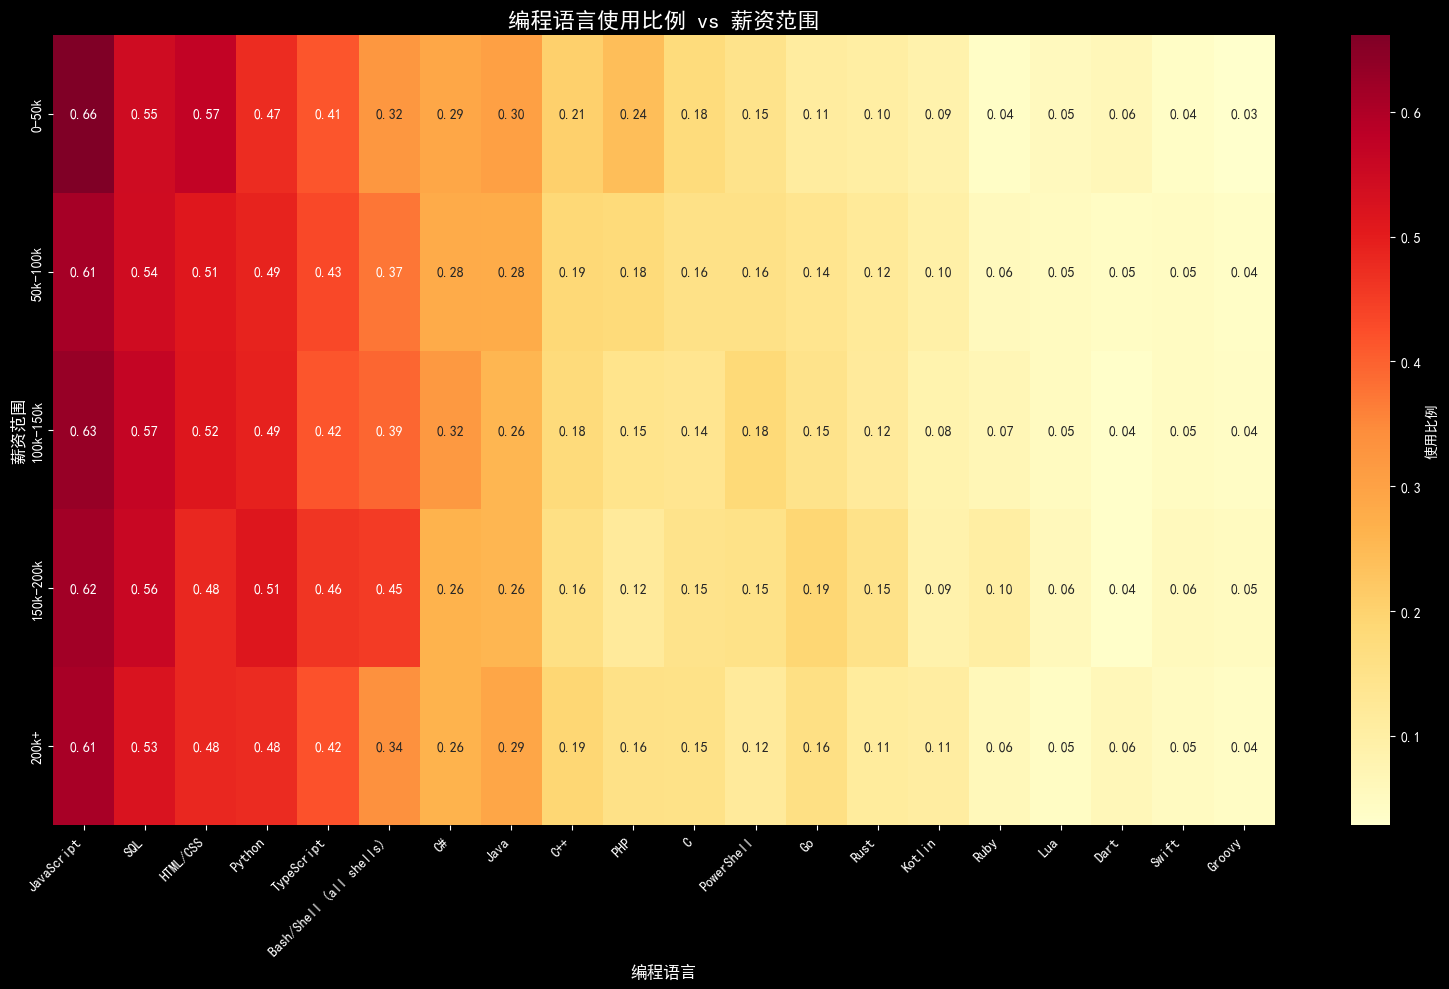

In [15]:
def process_data(df):
    df['CompTotal'] = pd.to_numeric(df['CompTotal'], errors='coerce')
    salary_bins = [0, 50000, 100000, 150000, 200000, float('inf')]
    salary_labels = ['0-50k', '50k-100k', '100k-150k', '150k-200k', '200k+']
    df['SalaryRange'] = pd.cut(df['CompTotal'], bins=salary_bins, labels=salary_labels)
    languages = df['LanguageHaveWorkedWith'].str.get_dummies(sep=';')
    return df, languages

def create_language_salary_heatmap(df, languages):
    heatmap_data = languages.groupby(df['SalaryRange']).mean()# 分薪资范围计算比例
    top_languages = heatmap_data.sum().nlargest(20).index # 选择前20种最常用的语言
    heatmap_data = heatmap_data[top_languages]
    plt.figure(figsize=(16, 10))
    sns.heatmap(heatmap_data, annot=True, fmt='.2f', cmap='YlOrRd', cbar_kws={'label': '使用比例'})
    plt.title('编程语言使用比例 vs 薪资范围', fontsize=16)
    plt.xlabel('编程语言', fontsize=12)
    plt.ylabel('薪资范围', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

df_ssalary, languages = process_data(df)
create_language_salary_heatmap(df_ssalary, languages)

## **2. 参数估计和区间估计**

### 计算平均工作满意度的方差的95%置信区间

假设平均工作满意度满足正态分布

$\mu$ 未知, 求 $\sigma^2$ 的区间估计: $\frac{(n-1) S^2}{\sigma^2}=\sum_{i=1}^n\left(\frac{X_i-\bar{X}}{\sigma}\right)^2 \sim \chi^2(n-1)$

In [16]:
# 计算工作满意度的均值和方差
job_sat_clean = df['JobSat'].dropna()  # 先去掉NA值
job_sat_mean = job_sat_clean.mean()

job_sat_var = job_sat_clean.var()

n = len(job_sat_clean)
print(f'样本量: {n}')
print(f'工作满意度均值: {job_sat_mean:.4f}')
print(f'工作满意度方差: {job_sat_var:.4f}')

dof = n - 1 #dof

# 计算95%置信区间的临界值
chi2_lower = stats.chi2.ppf(0.025, dof) 
chi2_upper = stats.chi2.ppf(0.975, dof)

# 计算方差的置信区间
var_ci_upper = (n-1) * job_sat_var / chi2_lower
var_ci_lower = (n-1) * job_sat_var / chi2_upper

print(f'工作满意度方差的95%置信区间为: [{var_ci_lower:.4f}, {var_ci_upper:.4f}]')

样本量: 29126
工作满意度均值: 6.9350
工作满意度方差: 4.3608
工作满意度方差的95%置信区间为: [4.2909, 4.4325]


### 专业编程时长的平均值 及其95%置信区间。

假设服从正态分布,$\sigma^2$ 未知, 求 $\mu$ 的区间估计: $\frac{\bar{X}-\mu}{S / \sqrt{n}} \sim t(n-1)$

In [17]:
# 计算专业编程时长的均值和标准差
years_pro_clean = df['YearsCodePro'].dropna()  # 去掉NA值
years_pro_mean = years_pro_clean.mean()
years_pro_std = years_pro_clean.std()
n = len(years_pro_clean)

print(f'样本量: {n}')
print(f'专业编程时长均值: {years_pro_mean:.4f}')
print(f'专业编程时长标准差: {years_pro_std:.4f}')

dof = n - 1

# 计算95%置信区间
t_value = stats.t.ppf(0.975, dof) 
margin_error = t_value * years_pro_std / np.sqrt(n)
ci_lower = years_pro_mean - margin_error
ci_upper = years_pro_mean + margin_error
print(f'专业编程时长均值的95%置信区间为: [{ci_lower:.4f}, {ci_upper:.4f}]')

样本量: 51610
专业编程时长均值: 10.2110
专业编程时长标准差: 9.0751
专业编程时长均值的95%置信区间为: [10.1327, 10.2893]


## **3. 假设检验**
### 问题1:远程工作者的工作满意度(`JobSat`)是否显著高于线下工作者？


- 两个正态分布的均值之差的检验，利用课上的$t_{n+m-2}$分布来检验

$$
t = \frac{\bar{X} - \bar{Y} - \delta}{S_w \sqrt{\frac{1}{n_1} + \frac{1}{n_2}}}
$$

$$
S_w^2 = \frac{(n_1 - 1)S_1^2 + (n_2 - 1)S_2^2}{n_1 + n_2 - 2}
$$

1. 当 $\mu_1 - \mu_2 > \delta$ 时，$t \geq t_a(n_1 + n_2 - 2)$

2. 当 $\mu_1 - \mu_2 < \delta$ 时，$t \leq -t_a(n_1 + n_2 - 2)$

3. 当 $\mu_1 - \mu_2 \neq \delta$ 时，$|t| \geq t_{a/2}(n_1 + n_2 - 2)$

其中：
- $\bar{X}$ 和 $\bar{Y}$ 分别是两个样本的均值。
- $\delta$ 是假设的均值差异。
- $S_w$ 是两个样本的合并标准差。
- $n_1$ 和 $n_2$ 分别是两个样本的样本量。
- $t_a$ 和 $t_{a/2}$ 是自由度为 $n_1 + n_2 - 2$ 的t分布的临界值。

--- 

这里使用独立样本t检验

原假设 $H_0: \mu_1 = \mu_2$ (远程工作者和线下工作者的工作满意度相等)

备择假设 $H_1: \mu_1 > \mu_2$ (远程工作者的工作满意度高于线下工作者)




In [18]:
# 将数据分为远程工作者和线下工作者两组
remote_workers = df[df['RemoteWork'] == 'Remote']
non_remote_workers = df[df['RemoteWork'] == 'In-person']

# print(remote_workers.shape)
# print(non_remote_workers.shape)
# 计算两组的样本量、均值和标准差
n1 = len(remote_workers)
n2 = len(non_remote_workers)
mean1 = remote_workers['JobSat'].mean()
mean2 = non_remote_workers['JobSat'].mean()
std1 = remote_workers['JobSat'].std()
std2 = non_remote_workers['JobSat'].std()

dof = n1 + n2 - 2
s_w = np.sqrt(((n1-1)*std1**2 + (n2-1)*std2**2) / dof) # 计算合并标准差
delta = 0  # 假设均值差异为0
t_stat = (mean1 - mean2 - delta) / (s_w * np.sqrt(1/n1 + 1/n2)) # 计算t统计量
p_value = 1 - stats.t.cdf(t_stat, dof) # 计算p值（单尾检验）

print(f'远程工作者平均工作满意度: {mean1:.2f}')
print(f'线下工作者平均工作满意度: {mean2:.2f}')
print(f't统计量: {t_stat:.4f}')
print(f'p值: {p_value:.4f}')

if p_value < 0.05:
    print('在显著性水平0.05下，拒绝原假设')
    print('结论：远程工作者的工作满意度显著高于线下工作者')
else:
    print('在显著性水平0.05下，不能拒绝原假设')
    print('结论：没有足够证据表明远程工作者的工作满意度高于线下工作者')


远程工作者平均工作满意度: 7.07
线下工作者平均工作满意度: 6.63
t统计量: 17.6213
p值: 0.0000
在显著性水平0.05下，拒绝原假设
结论：远程工作者的工作满意度显著高于线下工作者


### 问题2:开发者对 AI 工具信任度 (`AIAcc`) 是否与开发经验 (`YearsCodePro`) 有显著关系？

In [19]:
# 将AIAcc的文本值映射为数值
aiacc_mapping = {
    'Highly distrust': 10.0,
    'Somewhat distrust': 20.0,
    'Neither trust nor distrust': 30.0,
    'Somewhat trust': 40.0,
    'Highly trust': 50.0,
    'NA': 30.0
}
df_test = df.copy()
df_test['AIAcc'] = df_test['AIAcc'].apply(lambda x: aiacc_mapping.get(x, x))
df_test['YearsCodePro'] = df_test['YearsCodePro'].replace('Less than 1 year', '0.5')
df_test['YearsCodePro'] = df_test['YearsCodePro'].replace('More than 50 years', '50')

# 将YearsCodePro转换为数值类型
df_test['YearsCodePro'] = pd.to_numeric(df_test['YearsCodePro'])

df_1 = df_test.dropna(subset=['AIAcc', 'YearsCodePro'])
# 计算相关系数
correlation = df_1['YearsCodePro'].corr(df_1['AIAcc'])
print(f'皮尔逊相关系数: {correlation:.4f}')

correlation_test = stats.pearsonr(df_1['YearsCodePro'].astype(float), df_1['AIAcc'].astype(float))
print(f'p值: {correlation_test[1]:.4f}')

if correlation_test[1] < 0.05:
    print('在显著性水平0.05下，AI工具信任度与开发经验存在显著相关关系')
else:
    print('在显著性水平0.05下，AI工具信任度与开发经验不存在显著相关关系')


皮尔逊相关系数: -0.0446
p值: 0.0000
在显著性水平0.05下，AI工具信任度与开发经验存在显著相关关系


## ANOVA分析
  - 将收入 (`CompTotal`) 作为目标变量，分析工作年限 (`YearsCodePro`)、远程工作 (`RemoteWork`) 和所在国家 (`Country`) 的联合影响。

In [20]:
# 多因素分析
import scipy.stats as st
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols
model = ols('CompTotal ~ C(YearsCodePro)+C(RemoteWork)+C(Country)', data=df).fit()
table = anova_lm(model)
print(table)

                      df         sum_sq        mean_sq          F  \
C(YearsCodePro)     50.0  3.700728e+128  7.401456e+126  28.756936   
C(RemoteWork)        2.0  8.535149e+125  4.267574e+125   1.658084   
C(Country)         184.0  1.036933e+129  5.635508e+126  21.895684   
Residual         33382.0  8.591854e+129  2.573798e+125        NaN   

                        PR(>F)  
C(YearsCodePro)  4.605576e-262  
C(RemoteWork)     1.905193e-01  
C(Country)        0.000000e+00  
Residual                   NaN  


通过对开发者收入(CompTotal)进行多因素方差分析(ANOVA),结果显示工作年限(YearsCodePro)、远程工作方式(RemoteWork)和所在国家(Country)这三个因素都与收入存在显著相关性(p值均<0.05)。其中工作年限的F值最大,是影响收入最主要的因素;其次是所在国家的影响;远程工作方式虽然也显著相关,但F值相对较小,影响程度最小。这表明在预测开发者收入时,应该重点考虑其工作经验和地理位置因素。

## **5. 机器学习**
### 使用线性回归分析编程年限和专业编程年限.

d:\Code\Miniconda\envs\notebook\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 178 (\N{SUPERSCRIPT TWO}) missing from font(s) SimHei.
  fig.canvas.print_figure(bytes_io, **kw)


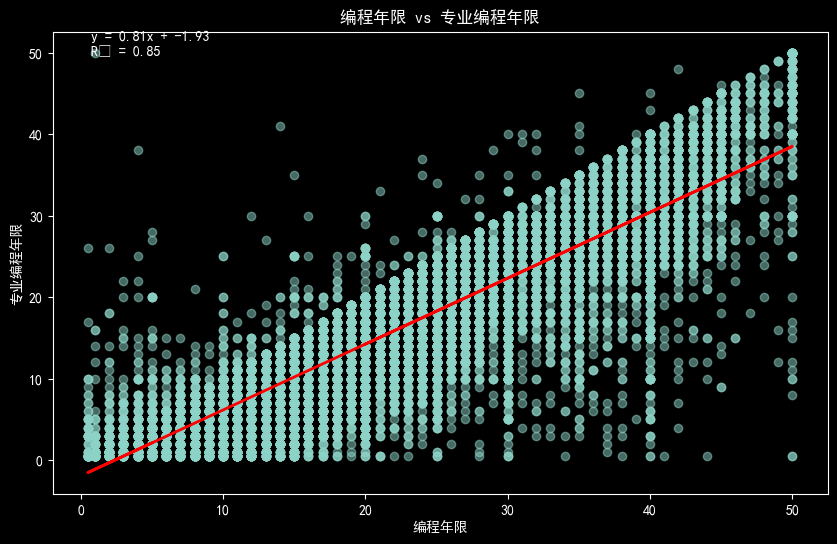

In [21]:
# 数据预处理,这一步还是挺关键的,因为有很多缺失值和文本数据
df_linear = df.copy()
df_linear['YearsCode'] = df_linear['YearsCode'].replace('More than 50 years', '50')
df_linear['YearsCodePro'] = df_linear['YearsCodePro'].replace('More than 50 years', '50')
df_linear['YearsCode'] = df_linear['YearsCode'].replace('Less than 1 year', '0.5')
df_linear['YearsCodePro'] = df_linear['YearsCodePro'].replace('Less than 1 year', '0.5')
df_linear['YearsCode'] = pd.to_numeric(df_linear['YearsCode'], errors='coerce')
df_linear['YearsCodePro'] = pd.to_numeric(df_linear['YearsCodePro'], errors='coerce')
code_years_df = df_linear[['YearsCode', 'YearsCodePro']].dropna()

# 创建线性回归模型
from sklearn.linear_model import LinearRegression
X = code_years_df['YearsCode'].values.reshape(-1, 1)
y = code_years_df['YearsCodePro'].values

model = LinearRegression()
model.fit(X, y)

# 可视化
plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.5)
plt.plot(X, model.predict(X), color='red', linewidth=2)
plt.title('编程年限 vs 专业编程年限')
plt.xlabel('编程年限')
plt.ylabel('专业编程年限')
equation = f'y = {model.coef_[0]:.2f}x + {model.intercept_:.2f}'
r2 = f'R² = {model.score(X, y):.2f}'
plt.text(0.05, 0.95, equation + '\n' + r2, transform=plt.gca().transAxes)# 添加回归方程和R²分数
plt.show()


### 使用随机森林对是否使用AI工具进行分类

模型性能评估报告:
              precision    recall  f1-score   support

           0       0.39      0.21      0.27      3033
           1       0.22      0.04      0.07      1607
           2       0.63      0.83      0.72      7538
           3       0.62      0.86      0.72       910

    accuracy                           0.59     13088
   macro avg       0.47      0.48      0.45     13088
weighted avg       0.52      0.59      0.53     13088



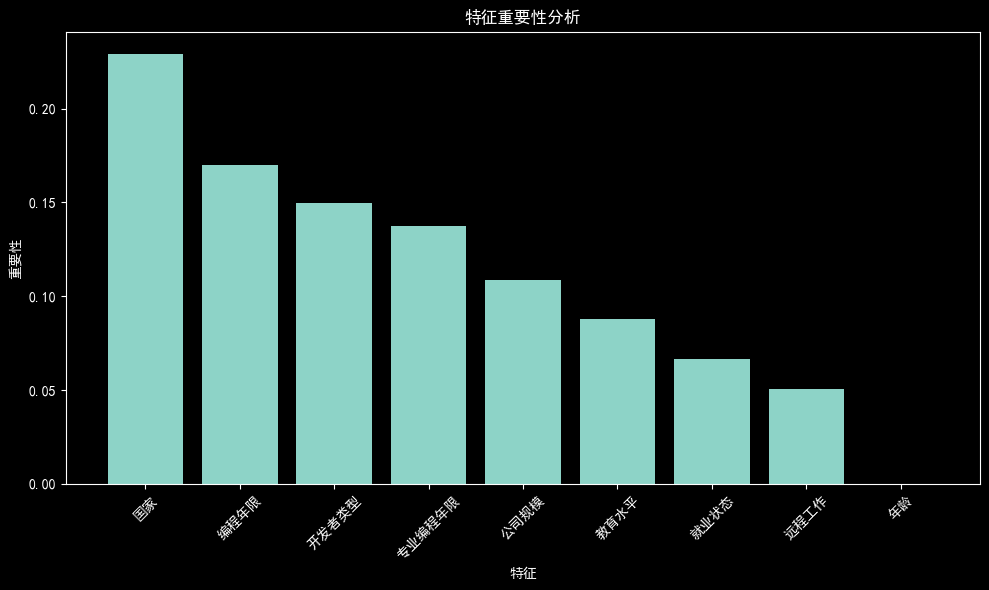

In [26]:
df_rf = df.copy()

# 对分类变量进行编码
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_rf['Country'] = le.fit_transform(df_rf['Country'])
df_rf['OrgSize'] = le.fit_transform(df_rf['OrgSize']) 
df_rf['EdLevel'] = le.fit_transform(df_rf['EdLevel'])
df_rf['AISelect'] = le.fit_transform(df_rf['AISelect'])
df_rf['Employment'] = le.fit_transform(df_rf['Employment'])
df_rf['RemoteWork'] = le.fit_transform(df_rf['RemoteWork'])
df_rf['DevType'] = le.fit_transform(df_rf['DevType'])
df_rf['YearsCode'] = df_rf['YearsCode'].replace('More than 50 years', '50')
df_rf['YearsCode'] = df_rf['YearsCode'].replace('Less than 1 year', '0.5')
df_rf['YearsCode'] = pd.to_numeric(df_rf['YearsCode'], errors='coerce')
df_rf['YearsCodePro'] = df_rf['YearsCodePro'].replace('More than 50 years', '50')
df_rf['YearsCodePro'] = df_rf['YearsCodePro'].replace('Less than 1 year', '0.5')
df_rf['YearsCodePro'] = pd.to_numeric(df_rf['YearsCodePro'], errors='coerce')
df_rf['Age'] = pd.to_numeric(df_rf['Age'], errors='coerce')

# 选择特征和目标变量
X = df_rf[['Country', 'OrgSize', 'EdLevel', 'YearsCode', 'YearsCodePro', 'Employment', 'RemoteWork', 'DevType', 'Age']].values
y = df_rf['AISelect'].values

# 划分训练集和测试集
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 训练随机森林分类器
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 评估模型
from sklearn.metrics import classification_report, confusion_matrix
y_pred = rf_model.predict(X_test)

# 打印模型性能报告
print("模型性能评估报告:")
print(classification_report(y_test, y_pred))

# 特征重要性分析
feature_importance = pd.DataFrame({
    '特征': ['国家', '公司规模', '教育水平', '编程年限', '专业编程年限', '就业状态', '远程工作', '开发者类型', '年龄'],
    '重要性': rf_model.feature_importances_
})
feature_importance = feature_importance.sort_values('重要性', ascending=False)

# 可视化特征重要性
plt.figure(figsize=(10, 6))
plt.bar(feature_importance['特征'], feature_importance['重要性'])
plt.title('特征重要性分析')
plt.xlabel('特征')
plt.ylabel('重要性')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
